<a href="https://colab.research.google.com/github/rahoolrathi/house-price-prediction-linear-regression/blob/main/Linear_Regression_implementation_on_single_varible.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math, copy

In [ ]:
x_train=np.array([1,2]);
y_train=np.array([300,500]);
print(f"X train={x_train}");
print(f"Y train={y_train}")


X train=[1 2]
Y train=[300 500]


In [ ]:
#m is the number of traning examples
m=len(x_train)

In [ ]:
for i in range(0,m):
  x_i=x_train[i];
  y_i=y_train[i];
  print(f"(x^[{i}],y^[{i}])=({x_i},{y_i})")

(x^[0],y^[0])=(1,300)
(x^[1],y^[1])=(2,500)


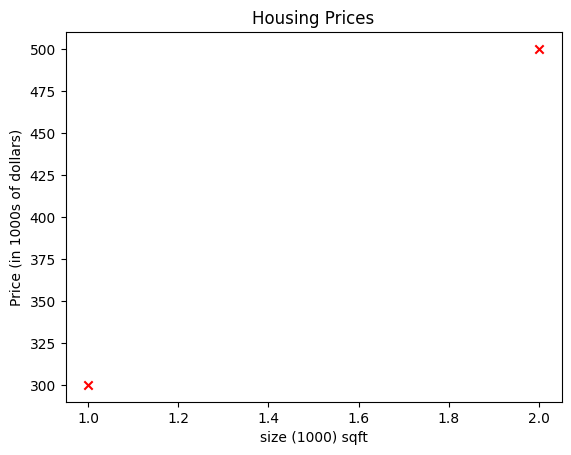

In [ ]:
#Plotting data on scatter plot
plt.scatter(x_train, y_train, marker='x', c='r')
#lets set title
plt.title("Housing Prices");
#lets set lebel of y axis
plt.ylabel('Price (in 1000s of dollars)');
#lets set label of x axis
plt.xlabel('size (1000) sqft');
plt.show()

In [ ]:
#Lets start with
w=500;
b=500;

print(f"w={w}");
print(f"b={b}");

w=500
b=500


In [ ]:
def compute_model_output(x,w,b):
  m=len(x);
  f_wb=np.zeros(m);
  for i in range(m):
    f_wb[i]=w*x[i]+b;

  return f_wb;

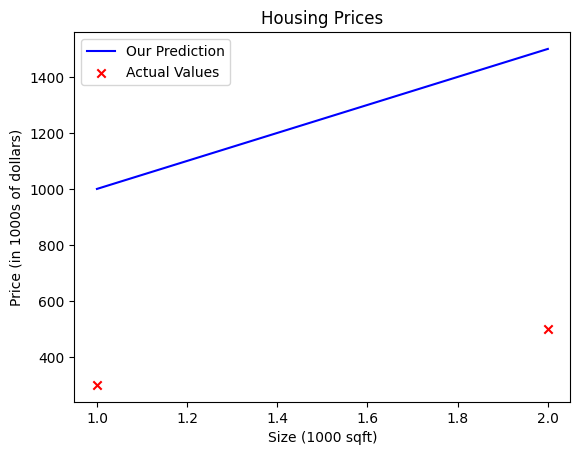

In [ ]:
#Cost Function For Linear Regression
def compute_cost(x,y,w,b):
  m=len(x);
  cost_sum=0;
  for i in range(m):
    f_wb=w*x[i]+b;
    cost=(f_wb-y[i])**2
    cost_sum=cost_sum+cost;
  total_cost=(1/(2*m))*cost_sum

  return total_cost;


In [ ]:
#Gradient Decent
#Step 1 Lets Compute first Graident

def compute_Gradient(x,y,w,b):
  m=len(x);
  dj_dw=0;
  dj_db=0;
  for i in range(m):
      f_wb = w * x[i] + b
      dj_dw_i = (f_wb - y[i]) * x[i]
      dj_db_i = f_wb - y[i]
      dj_db += dj_db_i
      dj_dw += dj_dw_i
  dj_dw = dj_dw / m
  dj_db = dj_db / m

  return dj_dw,dj_db;


In [ ]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):

    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in

    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db
        w = w - alpha * dj_dw

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")

    return w, b, J_history, p_history #return w and J,w history for graphing

In [ ]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-2
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha,
                                                    iterations, compute_cost, compute_Gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 7.93e+04  dj_dw: -6.500e+02, dj_db: -4.000e+02   w:  6.500e+00, b: 4.00000e+00
Iteration 1000: Cost 3.41e+00  dj_dw: -3.712e-01, dj_db:  6.007e-01   w:  1.949e+02, b: 1.08228e+02
Iteration 2000: Cost 7.93e-01  dj_dw: -1.789e-01, dj_db:  2.895e-01   w:  1.975e+02, b: 1.03966e+02
Iteration 3000: Cost 1.84e-01  dj_dw: -8.625e-02, dj_db:  1.396e-01   w:  1.988e+02, b: 1.01912e+02
Iteration 4000: Cost 4.28e-02  dj_dw: -4.158e-02, dj_db:  6.727e-02   w:  1.994e+02, b: 1.00922e+02
Iteration 5000: Cost 9.95e-03  dj_dw: -2.004e-02, dj_db:  3.243e-02   w:  1.997e+02, b: 1.00444e+02
Iteration 6000: Cost 2.31e-03  dj_dw: -9.660e-03, dj_db:  1.563e-02   w:  1.999e+02, b: 1.00214e+02
Iteration 7000: Cost 5.37e-04  dj_dw: -4.657e-03, dj_db:  7.535e-03   w:  1.999e+02, b: 1.00103e+02
Iteration 8000: Cost 1.25e-04  dj_dw: -2.245e-03, dj_db:  3.632e-03   w:  2.000e+02, b: 1.00050e+02
Iteration 9000: Cost 2.90e-05  dj_dw: -1.082e-03, dj_db:  1.751e-03   w:  2.000e+02, b: 1.00024e+02


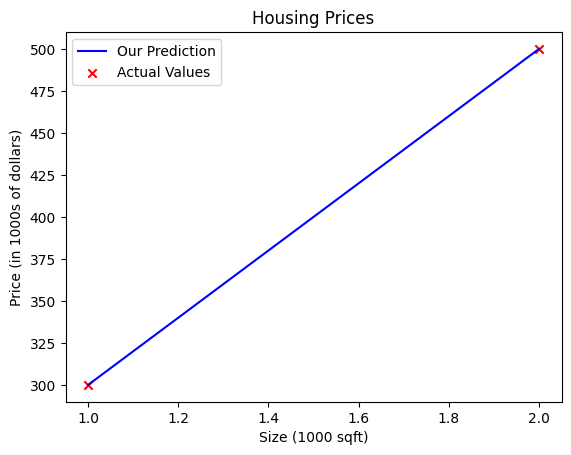

In [ ]:
tmp_f_wb=compute_model_output(x_train,w_final,b_final);
plt.plot(x_train,tmp_f_wb,c='b',label='Our Prediction');
plt.scatter(x_train,y_train,marker='x',c='r',label='Actual Values');
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.legend()
plt.show()